In [1]:
# -*- coding:utf-8 -*-
from numpy import *
import operator
from os import listdir
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines
from sklearn.neighbors import KNeighborsClassifier as kNN

KNN案例一:影片分类

In [2]:
"""
函数说明:创建数据集

Parameters:
    无
Returns:
    group - 数据集
    labels - 分类标签
Modify:
    2020-06-24
"""
def createDataSet():
    # 六组二维特征
    group = array([[3, 104], [2, 100], [1, 81], [101, 10], [99, 5], [98, 2]]) # 使用numpy科学计算包模块中的array创建矩阵
    # 六组特征的标签
    labels = ['爱情片', '爱情片', '爱情片', '动作片', '动作片', '动作片']
    return group, labels

In [6]:
"""
函数说明:kNN算法,分类器
Parameters:
    inX - 用于分类的数据(测试集)
    dataSet - 用于训练的数据(训练集)
    labes - 分类标签
    k - kNN算法参数,选择距离最小的k个点
Returns:
    sortedClassCount[0][0] - 分类结果
Modify:
    2020-06-24
"""
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]  # 矩阵的大小,numpy函数shape[0]返回dataSet的行数
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet  # 在列向量方向上重复inX共1次(横向)，行向量方向上重复inX共dataSetSize次(纵向)
    sqDiffMat = diffMat ** 2     # 二维特征相减后平方
    sqlDistances = sqDiffMat.sum(axis=1)  # sum()所有元素相加，sum(0)列相加，sum(1)行相加
    distances = sqlDistances ** 0.5     # 开方，计算出距离
    sortedDistIndicies = distances.argsort()  # 距离最小的样本从小到大排序 返回数据索引值
    classCount = {}  # 定义一个字典
    for i in range(k):
        votellable = labels[sortedDistIndicies[i]]  # 获取排序后，前k个样本的label
        classCount[votellable] = classCount.get(votellable, 0) + 1  # 指定默认值为0
        # 根据字典的第二个值进行排序 从大到小 python2 API为 classCount.iteritems() python3为classCount.items()
        # key=operator.itemgetter(1)表示按照字典的value进行排序；reverse=True为降序排序，
        SortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return SortedClassCount[0][0]  # 取出第一个元素的key值

In [7]:
group, labels = createDataSet()  # 创建数据集
# 测试集
test = [18, 90]
# KNN分类
ret = classify0(test, group, labels, 3)  # 返回分类标签
# 打印分类结果
print(ret)

爱情片


In [8]:
"""
函数说明:打开并解析文件，对数据进行分类：1代表不喜欢,2代表魅力一般,3代表极具魅力

Parameters:
    filename - 文件名
Returns:
    returnMat - 特征矩阵
    classLabelVector - 分类Label向量
Modify:
    2020-06-24
"""
def file2matrix(filename):
    fr = open(filename)
    arrayOlines = fr.readlines()
    numberOfLines = len(arrayOlines)
    returnMat = zeros((numberOfLines, 3))
    classLabelVector = []
    index = 0
    for line in arrayOlines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index, :] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector

In [21]:
datingDataMat, datingLabels = file2matrix("./data/datingTestSet2.txt")

In [40]:
"""
函数说明:可视化数据

Parameters:
    datingDataMat - 特征矩阵
    datingLabels - 分类Label
Returns:
    无
Modify:
    2020-06-24
"""


def showdatas(datingDataMat, datingLabels):
    # 设置汉字格式
    font = FontProperties(fname=r"./font/simsun.ttc", size=14)
    # 将fig画布分隔成1行1列,不共享x轴和y轴,fig画布的大小为(13,8)
    # 当nrow=2,nclos=2时,代表fig画布被分为四个区域,axs[0][0]表示第一行第一个区域
    fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(13, 8))

    numberOfLabels = len(datingLabels)
    LabelsColors = []
    for i in datingLabels:
        if i == 1:
            LabelsColors.append('black')
        if i == 2:
            LabelsColors.append('orange')
        if i == 3:
            LabelsColors.append('red')
    # 画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][0].scatter(x=datingDataMat[:, 0], y=datingDataMat[:, 1], color=LabelsColors, s=15, alpha=.5)
    # 设置标题,x轴label,y轴label
    axs0_title_text = axs[0][0].set_title(u'每年获得的飞行常客里程数与玩视频游戏所消耗时间占比', fontproperties=font)
    axs0_xlabel_text = axs[0][0].set_xlabel(u'每年获得的飞行常客里程数', fontproperties=font)
    axs0_ylabel_text = axs[0][0].set_ylabel(u'玩视频游戏所消耗时间占', fontproperties=font)
    plt.setp(axs0_title_text, size=9, weight='bold', color='red')
    plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black')

    # 画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][1].scatter(x=datingDataMat[:, 0], y=datingDataMat[:, 2], color=LabelsColors, s=15, alpha=.5)
    # 设置标题,x轴label,y轴label
    axs1_title_text = axs[0][1].set_title(u'每年获得的飞行常客里程数与每周消费的冰激淋公升数', fontproperties=font)
    axs1_xlabel_text = axs[0][1].set_xlabel(u'每年获得的飞行常客里程数', fontproperties=font)
    axs1_ylabel_text = axs[0][1].set_ylabel(u'每周消费的冰激淋公升数', fontproperties=font)
    plt.setp(axs1_title_text, size=9, weight='bold', color='red')
    plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black')

    # 画出散点图,以datingDataMat矩阵的第二(玩游戏)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[1][0].scatter(x=datingDataMat[:, 1], y=datingDataMat[:, 2], color=LabelsColors, s=15, alpha=.5)
    # 设置标题,x轴label,y轴label
    axs2_title_text = axs[1][0].set_title(u'玩视频游戏所消耗时间占比与每周消费的冰激淋公升数', fontproperties=font)
    axs2_xlabel_text = axs[1][0].set_xlabel(u'玩视频游戏所消耗时间占比', fontproperties=font)
    axs2_ylabel_text = axs[1][0].set_ylabel(u'每周消费的冰激淋公升数', fontproperties=font)
    plt.setp(axs2_title_text, size=9, weight='bold', color='red')
    plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black')
    # 设置图例
    didntLike = mlines.Line2D([], [], color='black', marker='.',
                              markersize=6, label='didntLike')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.',
                               markersize=6, label='smallDoses')
    largeDoses = mlines.Line2D([], [], color='red', marker='.',
                               markersize=6, label='largeDoses')
    # 添加图例
    axs[0][0].legend(handles=[didntLike, smallDoses, largeDoses])
    axs[0][1].legend(handles=[didntLike, smallDoses, largeDoses])
    axs[1][0].legend(handles=[didntLike, smallDoses, largeDoses])
    # 显示图片
    plt.show()

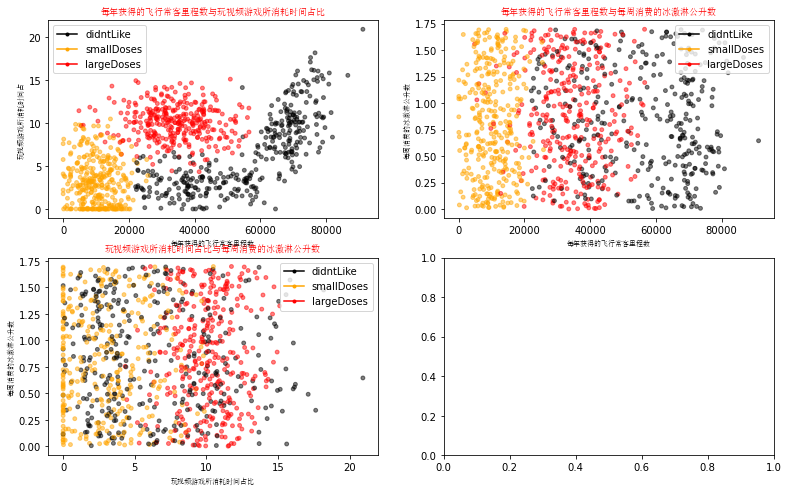

In [41]:
# 数据可视化
showdatas(datingDataMat, datingLabels)

plt.figure是Matplotlib库中的一个函数，用于创建一个新的图形窗口或画布。它返回一个Figure对象，可以在其上添加子图、图形元素和绘图。

fig.add_subplot(111):在图形窗口上添加了一个子图。

ax.plot(x, y): 是Matplotlib库中的一个函数，用于在指定的坐标轴上绘制一个折线图。

ax.scatter: 是Matplotlib库中的一个函数，用于在指定的坐标轴上绘制散点图。

plt.show: 函数显示了图形窗口。

切片详解:
矩阵[:,1]表示对矩阵进行切片操作，保留所有行（:），但只选择第二列（1）的元素。
在Python中，使用切片操作可以从列表、数组或矩阵中选择特定的元素子集。切片操作使用方括号 [] 来指定切片的范围。
对于二维矩阵来说，矩阵的第一维表示行，第二维表示列。切片操作中的 : 表示选择所有的行或列。而数字索引表示选择特定的行或列。
因此，矩阵[:,1]表示选择矩阵的所有行，但只选择第二列的元素。

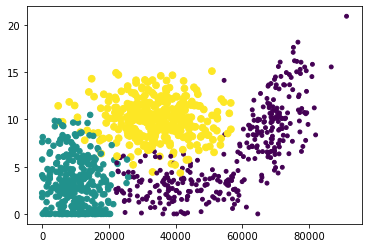

In [24]:
# matplotlib 展示
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:, 0], datingDataMat[:, 1], 15.0 * array(datingLabels), 15.0 * array(datingLabels))
plt.show()

In [ ]:
对数值比较大的特征值进行归一化：
当前特征值-当前所有特征中的最小值/当前特征最大值-当前特征下的最小值

In [25]:
"""
函数说明:对数据进行归一化

Parameters:
    dataSet - 特征矩阵
Returns:
    normDataSet - 归一化后的特征矩阵
    ranges - 数据范围
    minVals - 数据最小值

Modify:
    2020-06-24
"""
def autoNorm(dataSet):
    minValues = dataSet.min(0)  # min(0)返回该矩阵中每一列的最小值 min(1)返回该矩阵中每一行的最小值 结果依然是矩阵
    maxValues = dataSet.max(0)
    ranges = maxValues - minValues
    # print (shape(dataSet))  # shape(dataSet) 返回矩阵的行数和列数（1000，3）
    normDataSet = zeros(shape(dataSet))  # 创建一个元素是0 （1000，3）的矩阵
    m = dataSet.shape[0]  # 矩阵的行数
    # print(tile(minValues, (m, 1)))  # 将 minValues 一行3列的矩阵 平铺为999 行和3列
    normDataSet = dataSet - tile(minValues, (m, 1))  # 当前矩阵的每个元素 减去 每列矩阵的最小值
    normDataSet = normDataSet / tile(ranges, (m, 1))  # 归一化
    return normDataSet, ranges, minValues

In [27]:
"""
函数说明:分类器测试函数

Parameters:
    无
Returns:
    无
Modify:
    2020-06-24
"""
def datingClassTest():
    #取所有数据的百分之十
    hoRatio = 0.10
    #将返回的特征矩阵和分类向量分别存储到datingDataMat和datingLabels中
    datingDataMat, datingLabels = file2matrix("./data/datingTestSet2.txt")
    #数据归一化,返回归一化后的矩阵,数据范围,数据最小值
    normDataSet, ranges, minValues = autoNorm(datingDataMat)
    m = normDataSet.shape[0]
    numTestVecs = int(m * hoRatio)
    #分类错误计数
    errorCount = 0.0
    for i in range(numTestVecs):
        calssResult = classify0(normDataSet[i, :], normDataSet, datingLabels, 3)
        print("分类器的分类结果 :%d, 真实结果是: %d  " % (calssResult, datingLabels[i]))
        if (calssResult != datingLabels[i]): errorCount += 1.0
    print("错误率是: %f " % (errorCount / float(numTestVecs)*100))

In [28]:
datingClassTest()

分类器的分类结果 :3, 真实结果是: 3  
分类器的分类结果 :3, 真实结果是: 3  
分类器的分类结果 :2, 真实结果是: 2  
分类器的分类结果 :1, 真实结果是: 1  
分类器的分类结果 :1, 真实结果是: 1  
分类器的分类结果 :1, 真实结果是: 1  
分类器的分类结果 :1, 真实结果是: 1  
分类器的分类结果 :3, 真实结果是: 3  
分类器的分类结果 :1, 真实结果是: 1  
分类器的分类结果 :3, 真实结果是: 3  
分类器的分类结果 :1, 真实结果是: 1  
分类器的分类结果 :1, 真实结果是: 1  
分类器的分类结果 :2, 真实结果是: 2  
分类器的分类结果 :1, 真实结果是: 1  
分类器的分类结果 :1, 真实结果是: 1  
分类器的分类结果 :1, 真实结果是: 1  
分类器的分类结果 :1, 真实结果是: 1  
分类器的分类结果 :1, 真实结果是: 1  
分类器的分类结果 :2, 真实结果是: 2  
分类器的分类结果 :3, 真实结果是: 3  
分类器的分类结果 :2, 真实结果是: 2  
分类器的分类结果 :1, 真实结果是: 1  
分类器的分类结果 :2, 真实结果是: 2  
分类器的分类结果 :3, 真实结果是: 3  
分类器的分类结果 :2, 真实结果是: 2  
分类器的分类结果 :3, 真实结果是: 3  
分类器的分类结果 :2, 真实结果是: 2  
分类器的分类结果 :3, 真实结果是: 3  
分类器的分类结果 :2, 真实结果是: 2  
分类器的分类结果 :1, 真实结果是: 1  
分类器的分类结果 :3, 真实结果是: 3  
分类器的分类结果 :1, 真实结果是: 1  
分类器的分类结果 :3, 真实结果是: 3  
分类器的分类结果 :1, 真实结果是: 1  
分类器的分类结果 :2, 真实结果是: 2  
分类器的分类结果 :1, 真实结果是: 1  
分类器的分类结果 :1, 真实结果是: 1  
分类器的分类结果 :2, 真实结果是: 2  
分类器的分类结果 :3, 真实结果是: 3  
分类器的分类结果 :3, 真实结果是: 3  
分类器的分类结果 :1, 真实结果是: 1  
分类器的分类结果 :2, 真实结

In [29]:
"""
函数说明:通过输入一个人的三维特征,进行分类输出

Parameters:
    无
Returns:
    无

Modify:
    2020-06-24
"""
def classifyPerson():
    resultList = ['一点不喜欢', '有一点喜欢', '非常喜欢']  # 结果类型
    # python2 API 为raw_input、 python3 API为input
    # 三维特征用户输入
    percentTats = float(input("玩视频游戏所耗时间百分比:"))
    ffMiles = float(input("每年获得的飞行常客里程数:"))
    iceCream = float(input("每周消费的冰激淋公升数:"))
    datingDataMat, datingLabels = file2matrix("./data/datingTestSet2.txt")
    # 训练集归一化
    normDataSet, ranges, minValues = autoNorm(datingDataMat)
    # 生成NumPy数组,测试集
    inArray = array([percentTats, ffMiles, iceCream])  # 输入的数据作为一个矩阵
    # 进行分类预测
    classifierResult = classify0(inArray - minValues / ranges, datingDataMat, datingLabels, 3)
    print("你很可能是这么一个人: %s" % (resultList[classifierResult - 1]))

In [30]:
classifyPerson()

玩视频游戏所耗时间百分比: 20
每年获得的飞行常客里程数: 20
每周消费的冰激淋公升数: 20


你很可能是这么一个人: 有一点喜欢


In [31]:
def img2vector(filename):
    returnVect = zeros((1, 1024))  # 定义一个矩阵 1行 1024列 元素值为0
    file = open(filename)
    for i in range(32):
        lineStr = file.readline()
        for j in range(32):
            returnVect[0, 32 * i + j] = int(lineStr[j])  # 将32 行 32 列的矩阵 转为 1 行 1024 列矩阵
    return returnVect

手写数字分类

In [33]:

def handwritingClassTest():
    hwLabels = []
    # 引入 os 模块的 listdir 显示指定文件夹下的所有的文件名称
    trainingFileList = listdir("./trainingDigits")
    m = len(trainingFileList)  # 获取文件的个数
    trainingMat = zeros((m, 1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i, :] = img2vector('./trainingDigits/%s' % fileNameStr)
    testFileList = listdir("./testDigits")
    errorCount = 0.0
    mTest = len(testFileList)  # 测试集文件数目
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('./testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print("分类器的分类结果 :%d, 真实结果是: %d  " % (classifierResult, classNumStr))

        if (classifierResult != classNumStr): errorCount += 1.0
    print("错误率是: %f " % (errorCount / float(mTest)*100))

In [35]:
handwritingClassTest()

分类器的分类结果 :4, 真实结果是: 4  
分类器的分类结果 :4, 真实结果是: 4  
分类器的分类结果 :3, 真实结果是: 3  
分类器的分类结果 :9, 真实结果是: 9  
分类器的分类结果 :0, 真实结果是: 0  
分类器的分类结果 :0, 真实结果是: 0  
分类器的分类结果 :9, 真实结果是: 9  
分类器的分类结果 :7, 真实结果是: 7  
分类器的分类结果 :7, 真实结果是: 7  
分类器的分类结果 :0, 真实结果是: 0  
分类器的分类结果 :3, 真实结果是: 3  
分类器的分类结果 :2, 真实结果是: 2  
分类器的分类结果 :2, 真实结果是: 2  
分类器的分类结果 :5, 真实结果是: 5  
分类器的分类结果 :5, 真实结果是: 5  
分类器的分类结果 :5, 真实结果是: 5  
分类器的分类结果 :2, 真实结果是: 2  
分类器的分类结果 :6, 真实结果是: 6  
分类器的分类结果 :6, 真实结果是: 6  
分类器的分类结果 :9, 真实结果是: 9  
分类器的分类结果 :8, 真实结果是: 8  
分类器的分类结果 :1, 真实结果是: 8  
分类器的分类结果 :1, 真实结果是: 1  
分类器的分类结果 :8, 真实结果是: 8  
分类器的分类结果 :1, 真实结果是: 1  
分类器的分类结果 :3, 真实结果是: 8  
分类器的分类结果 :9, 真实结果是: 9  
分类器的分类结果 :6, 真实结果是: 6  
分类器的分类结果 :6, 真实结果是: 6  
分类器的分类结果 :5, 真实结果是: 5  
分类器的分类结果 :2, 真实结果是: 2  
分类器的分类结果 :5, 真实结果是: 5  
分类器的分类结果 :5, 真实结果是: 5  
分类器的分类结果 :2, 真实结果是: 2  
分类器的分类结果 :2, 真实结果是: 2  
分类器的分类结果 :9, 真实结果是: 9  
分类器的分类结果 :3, 真实结果是: 3  
分类器的分类结果 :0, 真实结果是: 0  
分类器的分类结果 :7, 真实结果是: 7  
分类器的分类结果 :7, 真实结果是: 7  
分类器的分类结果 :0, 真实结果是: 0  
分类器的分类结果 :9, 真实结

sklearn是指Scikit-learn（全名为scikit-learn），它是一个用于机器学习的Python库。Scikit-learn提供了一系列的机器学习算法和工具，用于数据挖掘和数据分析。

In [37]:
"""
函数说明:手写数字分类测试
Parameters:
    无
Returns:
    无

Modify:
    2020-06-24
"""

def handwritingClassTest_sklearn():
    # 训练集的Labels
    hwLabels = []
    # 返回trainingDigits目录下的文件名
    trainingFileList = listdir('./trainingDigits')
    # 返回文件夹下文件的个数
    m = len(trainingFileList)
    # 初始化训练的Mat矩阵,测试集
    trainingMat = zeros((m, 1024))
    # 从文件名中解析出训练集的类别
    for i in range(m):
        # 获得文件的名字
        fileNameStr = trainingFileList[i]
        # 获得分类的数字
        classNumber = int(fileNameStr.split('_')[0])
        # 将获得的类别添加到hwLabels中
        hwLabels.append(classNumber)
        # 将每一个文件的1x1024数据存储到trainingMat矩阵中
        trainingMat[i, :] = img2vector('./trainingDigits/%s' % (fileNameStr))
    # 构建kNN分类器
    neigh = kNN(n_neighbors=3, algorithm='auto')
    # 拟合模型, trainingMat为训练矩阵,hwLabels为对应的标签
    neigh.fit(trainingMat, hwLabels)
    # 返回testDigits目录下的文件列表
    testFileList = listdir('./testDigits')
    # 错误检测计数
    errorCount = 0.0
    # 测试数据的数量
    mTest = len(testFileList)
    # 从文件中解析出测试集的类别并进行分类测试
    for i in range(mTest):
        # 获得文件的名字
        fileNameStr = testFileList[i]
        # 获得分类的数字
        classNumber = int(fileNameStr.split('_')[0])
        # 获得测试集的1x1024向量,用于训练
        vectorUnderTest = img2vector('./testDigits/%s' % (fileNameStr))
        # 获得预测结果
        # classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        classifierResult = neigh.predict(vectorUnderTest)
        print("分类返回结果为%d\t真实结果为%d" % (classifierResult, classNumber))
        if (classifierResult != classNumber):
            errorCount += 1.0
    print("总共错了%d个数据\n错误率为%f%%" % (errorCount, errorCount / mTest * 100))

In [38]:
handwritingClassTest_sklearn()

分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为3	真实结果为3
分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为9	真实结果为9
分类返回结果为7	真实结果为7
分类返回结果为7	真实结果为7
分类返回结果为0	真实结果为0
分类返回结果为3	真实结果为3
分类返回结果为2	真实结果为2
分类返回结果为2	真实结果为2
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为2
分类返回结果为6	真实结果为6
分类返回结果为6	真实结果为6
分类返回结果为9	真实结果为9
分类返回结果为8	真实结果为8
分类返回结果为1	真实结果为8
分类返回结果为1	真实结果为1
分类返回结果为8	真实结果为8
分类返回结果为1	真实结果为1
分类返回结果为3	真实结果为8
分类返回结果为9	真实结果为9
分类返回结果为6	真实结果为6
分类返回结果为6	真实结果为6
分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为2
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为2
分类返回结果为2	真实结果为2
分类返回结果为9	真实结果为9
分类返回结果为3	真实结果为3
分类返回结果为0	真实结果为0
分类返回结果为7	真实结果为7
分类返回结果为7	真实结果为7
分类返回结果为0	真实结果为0
分类返回结果为9	真实结果为9
分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为3	真实结果为3
分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为3	真实结果为3
分类返回结果为4	真实结果为4
分类返回结果为3	真实结果为3
分类返回结果为1	真实结果为1
分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为7	真实结果为7
分类返回结果为9	真实结果为9
分类返回结果为7	真实结果为7
分类返回结果为0	真实结果为0
分类返回结果为7	真实结果为7
分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为2